In [1]:
import pandas
import numpy
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
month_data=pandas.read_csv('C:/Users/MYPC/Downloads/monthly_price1.csv')

In [5]:
month_data

,Month,Date,Year,Price
0,1,31,2000,219.942449
1,2,29,2000,275.117647
2,3,31,2000,263.198203
3,4,30,2000,253.428767
4,5,31,2000,215.742602
5,6,30,2000,261.096335
6,7,31,2000,213.314059
7,8,31,2000,263.703758
8,9,30,2000,233.686687
9,10,31,2000,221.362520


In [6]:
month_data.head()

,Month,Date,Year,Price
0,1,31,2000,219.942449
1,2,29,2000,275.117647
2,3,31,2000,263.198203
3,4,30,2000,253.428767
4,5,31,2000,215.742602


In [7]:
month_data.head()

,Month,Date,Year,Price
0,1,31,2000,219.942449
1,2,29,2000,275.117647
2,3,31,2000,263.198203
3,4,30,2000,253.428767
4,5,31,2000,215.742602


Text(0.5, 1.0, 'Price-Year Data')

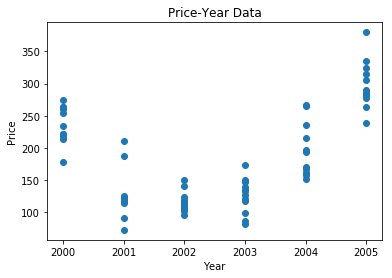

In [8]:
plt.scatter(month_data['Year'],month_data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price-Year Data')

In [9]:
#spliting the data into train and test datas
mnth_data_x=month_data[['Month','Year','Date']]
mnth_data_y=month_data[['Price']]

In [10]:
mnth_data_x

,Month,Year,Date
0,1,2000,31
1,2,2000,29
2,3,2000,31
3,4,2000,30
4,5,2000,31
5,6,2000,30
6,7,2000,31
7,8,2000,31
8,9,2000,30
9,10,2000,31


In [11]:
#Divide the data into training and test set.train set contains 80% of the data and test set contain 20% of the data
x_train,y_train,x_test,y_test=train_test_split(mnth_data_x,mnth_data_y,test_size=0.20)

In [12]:
x_train

,Month,Year,Date
56,9,2004,30
39,4,2003,30
58,11,2004,30
61,2,2005,28
8,9,2000,30
64,5,2005,31
7,8,2000,31
37,2,2003,28
34,11,2002,30
50,3,2004,31


In [13]:
month_scaler=StandardScaler()
month_scaler.fit(pandas.DataFrame(x_train['Month']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train[['Month']]=month_scaler.transform(x_train[['Month']])

In [15]:
x_train

,Month,Year,Date
56,0.740069,2004,30
39,-0.724651,2003,30
58,1.325957,2004,30
61,-1.310539,2005,28
8,0.740069,2000,30
64,-0.431707,2005,31
7,0.447125,2000,31
37,-1.310539,2003,28
34,1.325957,2002,30
50,-1.017595,2004,31


In [16]:
year_scaler=StandardScaler()
year_scaler.fit(pandas.DataFrame(x_train['Year']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
x_train[['Year']]=year_scaler.transform(x_train[['Year']])

In [18]:
x_train

,Month,Year,Date
56,0.740069,0.878191,30
39,-0.724651,0.296134,30
58,1.325957,0.878191,30
61,-1.310539,1.460248,28
8,0.740069,-1.450037,30
64,-0.431707,1.460248,31
7,0.447125,-1.450037,31
37,-1.310539,0.296134,28
34,1.325957,-0.285923,30
50,-1.017595,0.878191,31


In [19]:
date_scaler=StandardScaler()
date_scaler.fit(pandas.DataFrame(x_train['Date']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
x_train[['Date']]=date_scaler.transform(x_train[['Date']])

In [21]:
x_train

,Month,Year,Date
56,0.740069,0.878191,-0.674356
39,-0.724651,0.296134,-0.674356
58,1.325957,0.878191,-0.674356
61,-1.310539,1.460248,-3.419950
8,0.740069,-1.450037,-0.674356
64,-0.431707,1.460248,0.698440
7,0.447125,-1.450037,0.698440
37,-1.310539,0.296134,-3.419950
34,1.325957,-0.285923,-0.674356
50,-1.017595,0.878191,0.698440


In [22]:
y_train

,Month,Year,Date
68,9,2005,30
71,12,2005,31
46,11,2003,30
43,8,2003,31
16,5,2001,31
45,10,2003,31
29,6,2002,30
54,7,2004,31
36,1,2003,31
20,9,2001,30


In [23]:
date2_scaler=StandardScaler()
date2_scaler.fit(pandas.DataFrame(y_train['Date']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
y_train[['Date']]=date2_scaler.transform(y_train[['Date']])

In [25]:
y_train

,Month,Year,Date
68,9,2005,-0.267261
71,12,2005,0.734968
46,11,2003,-0.267261
43,8,2003,0.734968
16,5,2001,0.734968
45,10,2003,0.734968
29,6,2002,-0.267261
54,7,2004,0.734968
36,1,2003,0.734968
20,9,2001,-0.267261


In [26]:
year2_scaler=preprocessing.StandardScaler()
year2_scaler.fit(pandas.DataFrame(y_train['Year']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
y_train[['Year']]=year2_scaler.transform(y_train[['Year']])

In [28]:
y_train

,Month,Year,Date
68,9,1.478817,-0.267261
71,12,1.478817,0.734968
46,11,0.279776,-0.267261
43,8,0.279776,0.734968
16,5,-0.919265,0.734968
45,10,0.279776,0.734968
29,6,-0.319744,-0.267261
54,7,0.879297,0.734968
36,1,0.279776,0.734968
20,9,-0.919265,-0.267261


In [29]:
mnth2_scaler=StandardScaler()
mnth2_scaler.fit(pandas.DataFrame(y_train['Month']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
y_train[['Month']]=mnth2_scaler.transform(y_train[['Month']])

In [31]:
y_train

,Month,Year,Date
68,0.668043,1.478817,-0.267261
71,1.503096,1.478817,0.734968
46,1.224745,0.279776,-0.267261
43,0.389692,0.279776,0.734968
16,-0.445362,-0.919265,0.734968
45,0.946394,0.279776,0.734968
29,-0.167011,-0.319744,-0.267261
54,0.111340,0.879297,0.734968
36,-1.558766,0.279776,0.734968
20,0.668043,-0.919265,-0.267261


In [32]:
simple_linear_regression=LinearRegression()

In [33]:
simple_linear_regression.fit(pandas.DataFrame(x_train),(x_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
y_pred=simple_linear_regression.predict(pandas.DataFrame(x_train)),(pandas.DataFrame(x_test))

In [35]:
y_pred=simple_linear_regression.predict(pandas.DataFrame(y_train))

In [36]:
y_pred

array([[217.44950127],
       [217.09162536],
       [195.20674486],
       [185.44019466],
       [155.35687634],
       [188.57641942],
       [174.67669236],
       [196.56157287],
       [174.463408  ],
       [166.69153891],
       [165.83917836],
       [178.52866895],
       [149.29771118],
       [136.39493623],
       [213.9554006 ]])

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train,x_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
y_pred=regressor.predict(y_train)

In [39]:
r2_score(y_test ,y_pred)

0.9128143333122929

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,x_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [41]:
y_pred=regressor.predict(y_train)
from sklearn.metrics import r2_score
r2_score(y_test ,y_pred)

0.8888298393823127